#Stroke Prediction Model


##Library Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

##Dataset Import

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BCU/Dissertation/healthcare-dataset-stroke-data.csv")

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#removing ID column as it is not useful for the prediction model
del data['id']
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
#Replace Gender labelled as Other as NULL
data ['gender'] = data['gender'].replace(['Other'], np.nan)

In [ ]:
#Find missing data within the dataset
data.isnull().sum()

gender                 1
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Removing missing value as imputing the BMI column with Average/Mean value will make the model skewed or bias
data = data.dropna()

In [ ]:
#Missing data are removed
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#Data Visualisation

##Correlation Heatmap

In [ ]:
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274395,0.257104,0.236000,0.333314,0.232313
hypertension,0.274395,1.000000,0.115978,0.180614,0.167770,0.142503
heart_disease,0.257104,0.115978,1.000000,0.154577,0.041322,0.137929
avg_glucose_level,0.236000,0.180614,0.154577,1.000000,0.175672,0.138984
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.232313,0.142503,0.137929,0.138984,0.042341,1.000000


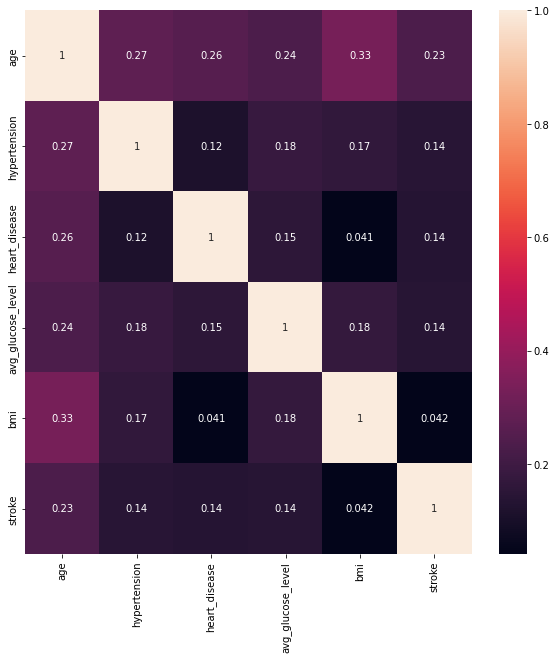

In [ ]:
corr = data.corr()
top_features = corr.index
plt.figure(figsize = (10,10))
sns.heatmap(data[top_features].corr(), annot = True)

##Count Plot

Female    2897
Male      2011
Name: gender, dtype: int64


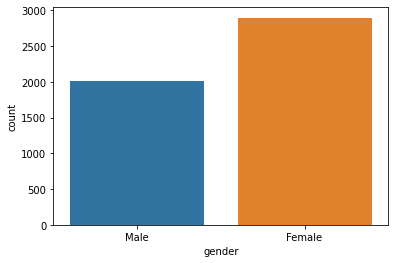

In [ ]:
sns.countplot(data = data, x = "gender")
print(data['gender'].value_counts())

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


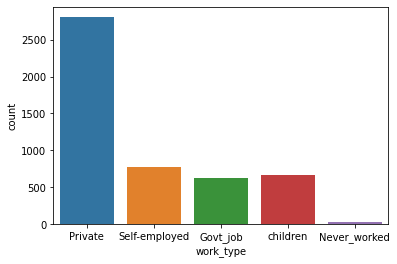

In [ ]:
sns.countplot(data = data, x = "work_type")
print(data['work_type'].value_counts())

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64


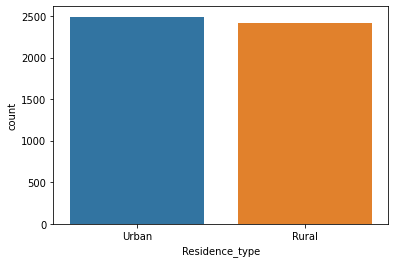

In [ ]:
sns.countplot(data = data, x = "Residence_type")
print(data['Residence_type'].value_counts())

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64


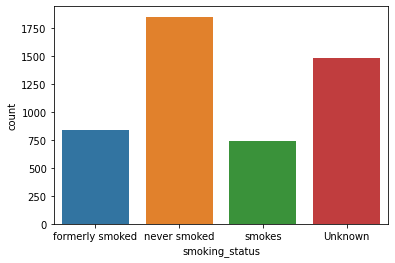

In [ ]:
sns.countplot(data = data, x = "smoking_status")
print(data['smoking_status'].value_counts())

0    4457
1     451
Name: hypertension, dtype: int64


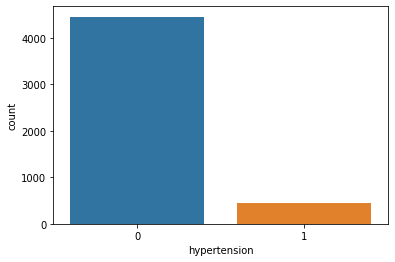

In [ ]:
sns.countplot(data = data, x = "hypertension")
print(data['hypertension'].value_counts())

Yes    3204
No     1704
Name: ever_married, dtype: int64


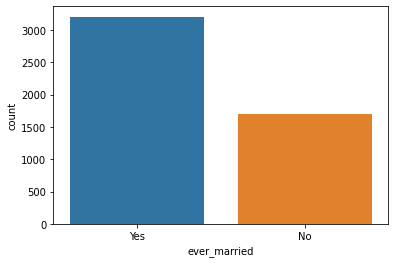

In [ ]:
sns.countplot(data = data, x = "ever_married")
print(data['ever_married'].value_counts())

0    4665
1     243
Name: heart_disease, dtype: int64


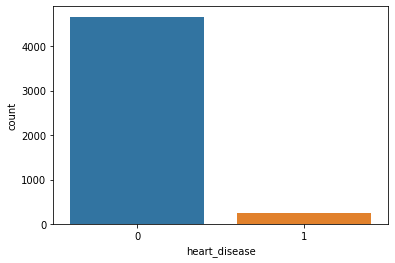

In [ ]:
sns.countplot(data = data, x = "heart_disease")
print(data['heart_disease'].value_counts())

0    4699
1     209
Name: stroke, dtype: int64


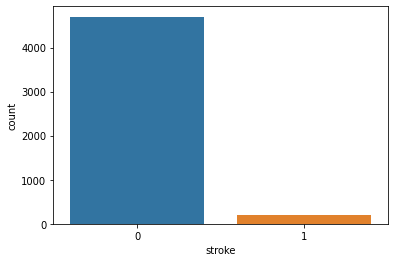

In [ ]:
sns.countplot(data = data, x = "stroke")
print(data['stroke'].value_counts())

##Violin Plot

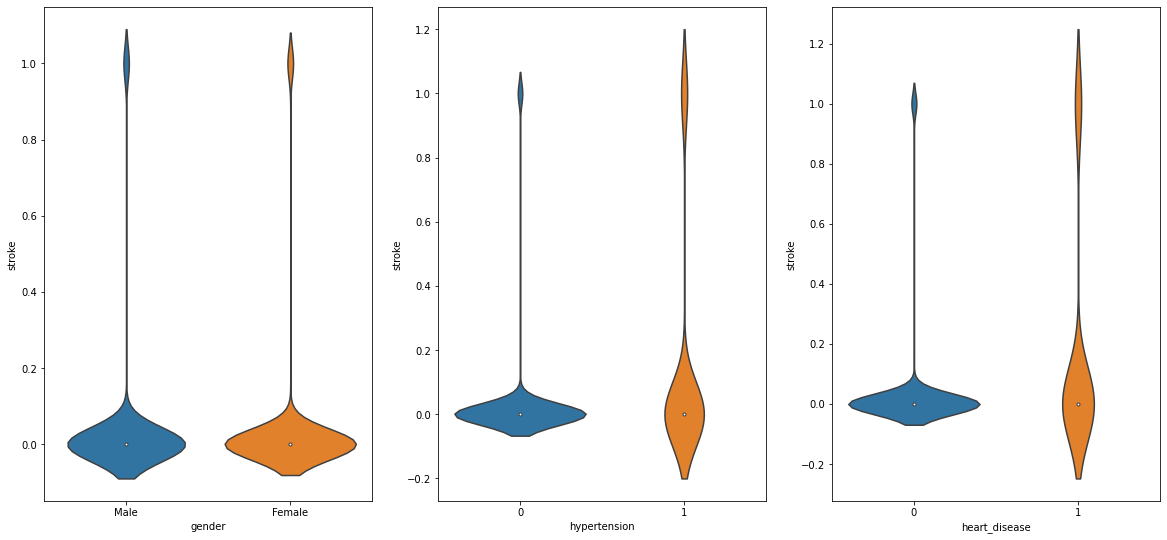

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = data)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = data)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = data)
plt.show()

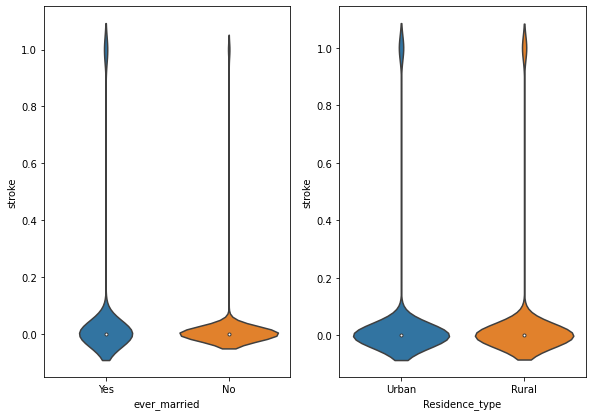

In [ ]:
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
sns.violinplot(x = 'ever_married', y = 'stroke', data = data)
plt.subplot(2,3,2)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = data)
plt.show()

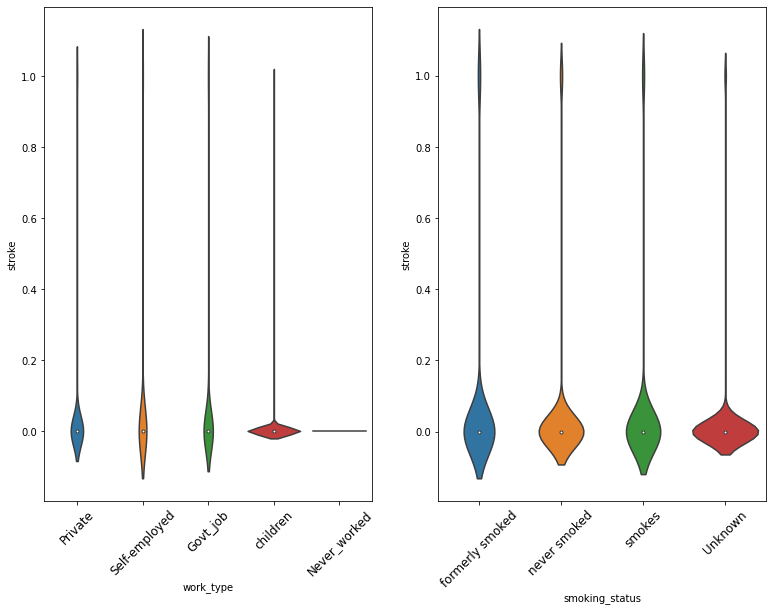

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(2,3,1)
sns.violinplot(x = 'work_type', y = 'stroke', data = data)
plt.xticks(fontsize=12, rotation=45)
plt.subplot(2,3,2)
sns.violinplot(x = 'smoking_status', y = 'stroke', data = data)
plt.xticks(fontsize=12, rotation=45)
plt.show()

##Pair Plot

<Figure size 1440x1440 with 0 Axes>

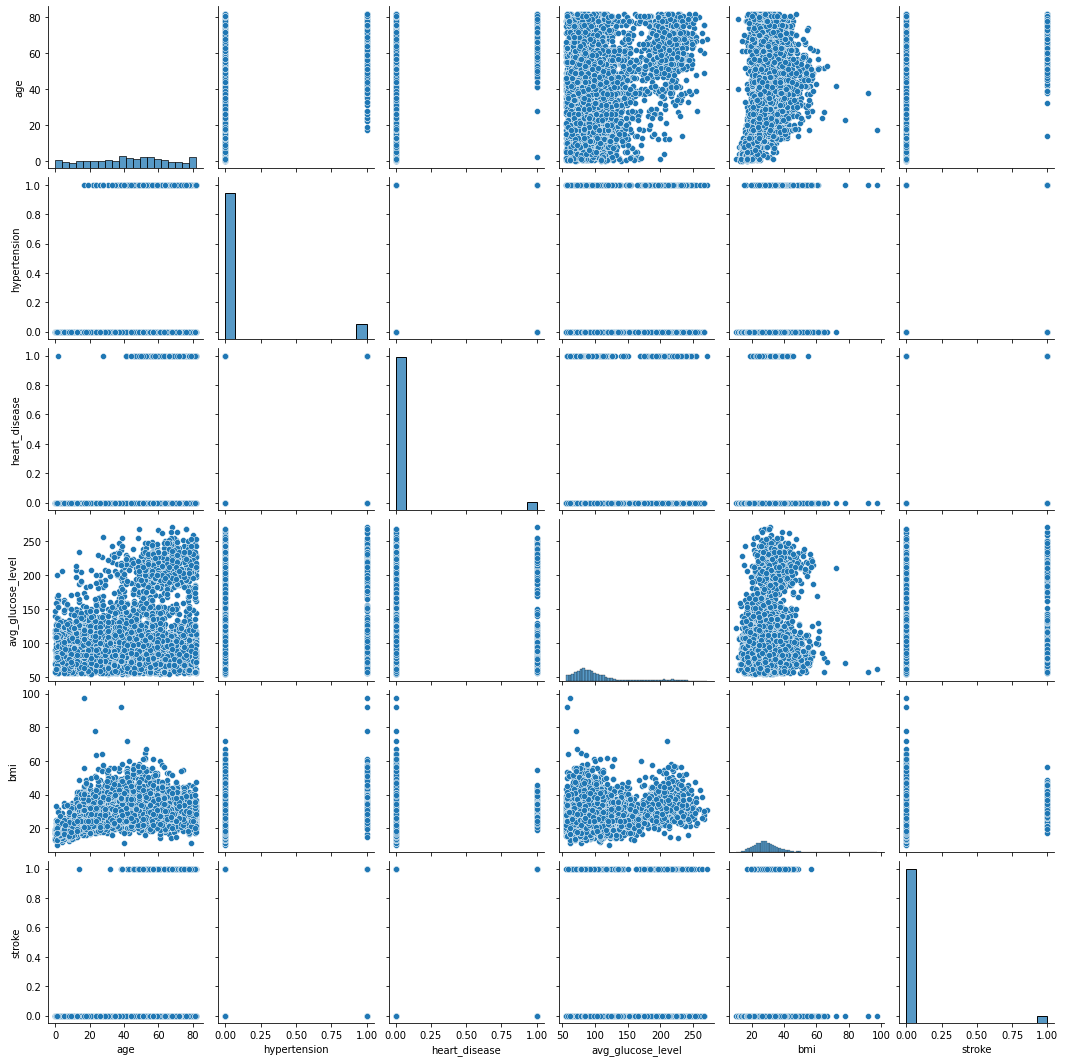

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

##Scatter Plot

<Figure size 648x648 with 0 Axes>

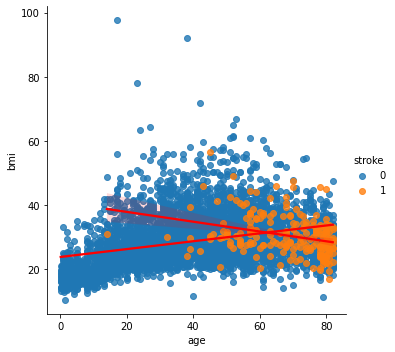

In [ ]:
fig = plt.figure(figsize = (9,9))
sns.lmplot(data = data, x = 'age', y = 'bmi', hue = 'stroke', line_kws={"color": "red"})
plt.show()

<Figure size 648x648 with 0 Axes>

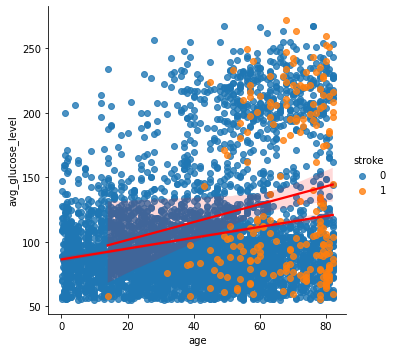

In [ ]:
fig = plt.figure(figsize = (9,9))
sns.lmplot(data = data, x = 'age', y = 'avg_glucose_level', hue = 'stroke', line_kws={"color": "red"})
plt.show()

<Figure size 648x648 with 0 Axes>

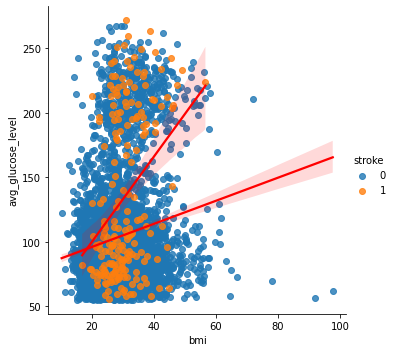

In [ ]:
fig = plt.figure(figsize = (9,9))
sns.lmplot(data = data, x = 'bmi', y = 'avg_glucose_level', hue = 'stroke', line_kws={"color": "red"})
plt.show()

##Distribution Plot

<Figure size 720x720 with 0 Axes>

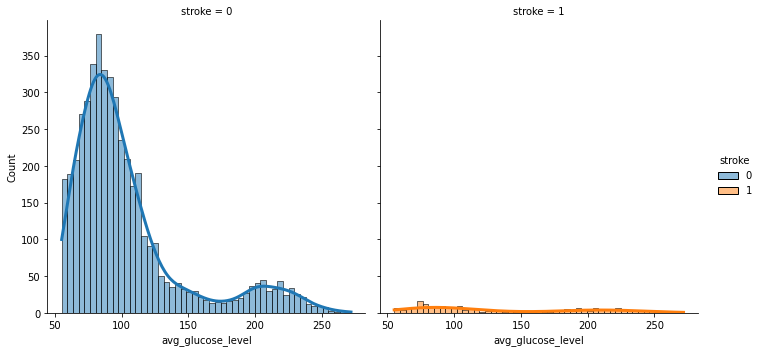

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.displot(data = data, x = "avg_glucose_level", hue = 'stroke', col = 'stroke', kde = True,line_kws={'lw': 3})
fig.show()

<Figure size 720x720 with 0 Axes>

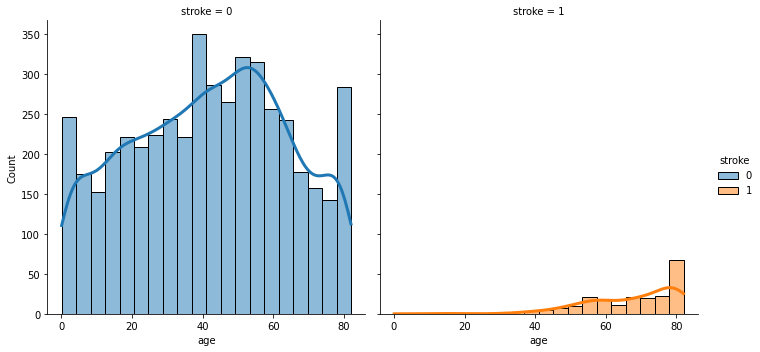

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.displot(data = data, x = "age", hue = 'stroke', col = 'stroke', kde = True,line_kws={'lw': 3})
fig.show()

<Figure size 720x720 with 0 Axes>

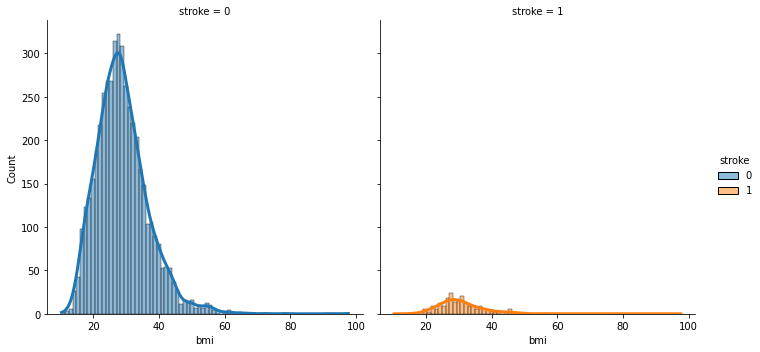

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.displot(data = data, x = "bmi", hue = 'stroke', col = 'stroke', kde = True,line_kws={'lw': 3})
fig.show()

#Data Pre-processing

In [ ]:
#handling categorical varaible using Label Encoding for Ever married and Residence Type
label_encoder = LabelEncoder()
data.loc[:,"ever_married"] = label_encoder.fit_transform(data.loc[:,"ever_married"])
data.loc[:,"Residence_type"] = label_encoder.fit_transform(data.loc[:,"Residence_type"])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,0,children,0,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [ ]:
x_feature = data.drop(['stroke'], axis = 1)
y_feature = data['stroke']

In [ ]:
x_feature

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked
5,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,0,children,0,103.08,18.6,Unknown
5106,Female,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked
5107,Female,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked
5108,Male,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked


In [ ]:
#handling categorical varaible using One-Hot encoding for Gender, Work Type and Smoking Status
onehotEn = OneHotEncoder()

columntrans = ColumnTransformer(transformers= [('encoder', onehotEn, [0,5,9])], remainder = 'passthrough')
x_transformed = columntrans.fit_transform(x_feature)

In [ ]:
print('Shape of X: ', x_transformed.shape)
print('Shape of Y: ', y_feature.shape)

Shape of X:  (4908, 18)
Shape of Y:  (4908,)


###Handling Imbalanced Data

In [ ]:
#target class before class balancing
y_feature.value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [ ]:
#Class Balancing using SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_transformed, y_feature)

In [ ]:
print('Shape of X: ', x_smote.shape)
print('Shape of Y: ', y_smote.shape)

Shape of X:  (9398, 18)
Shape of Y:  (9398,)


In [ ]:
#Target class after class balancing
y_smote.value_counts()

1    4699
0    4699
Name: stroke, dtype: int64

###Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size= 0.2, random_state= 42)

In [ ]:
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of Y_test: ', y_test.shape)

Shape of X_train:  (7518, 18)
Shape of y_train:  (7518,)
Shape of X_test:  (1880, 18)
Shape of Y_test:  (1880,)


###Feature Scaling

In [ ]:
#MinMaxScalar
MMscalar = MinMaxScaler()
X_train_MinMax = MMscalar.fit_transform(X_train)
X_test_MinMax = MMscalar.fit_transform(X_test)

In [ ]:
#StandardScalar -> assume that the distribution is normally distributed
scalar = StandardScaler()
X_train_standard = scalar.fit_transform(X_train)
X_test_standard = scalar.fit_transform(X_test)

#Model Training

####Artificial Neural Network (ANN)

#####ANN without feature scaling

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu"))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs = 50)

Epoch 1/50
752/752 [==============================] - 3s 3ms/step - loss: 0.2790 - accuracy: 0.8833
Epoch 2/50
752/752 [==============================] - 1s 2ms/step - loss: 0.2798 - accuracy: 0.8806
Epoch 3/50
752/752 [==============================] - 1s 2ms/step - loss: 0.2847 - accuracy: 0.8841
Epoch 4/50
752/752 [==============================] - 1s 2ms/step - loss: 0.2701 - accuracy: 0.8868
Epoch 5/50
752/752 [==============================] - 1s 2ms/step - loss: 0.2666 - accuracy: 0.8936
Epoch 6/50
752/752 [==============================] - 1s 2ms/step - loss: 0.2727 - accuracy: 0.8820
Epoch 7/50
752/752 [==============================] - 2s 2ms/step - loss: 0.2716 - accuracy: 0.8841
Epoch 8/50
752/752 [==============================] - 2s 2ms/step - loss: 0.2667 - accuracy: 0.8893
Epoch 9/50
752/752 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.8907
Epoch 10/50
752/752 [==============================] - 1s 2ms/step - loss: 0.2634 - accuracy: 0.8929

In [ ]:
y_pred_wFS = model.predict(X_test)
y_pred_wFS = (y_pred_wFS > 0.5)

59/59 [==============================] - 0s 2ms/step


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_wFS))
print('R square:', r2_score(y_test, y_pred_wFS))
print('Accuracy:', accuracy_score(y_test, y_pred_wFS))

report = classification_report(y_test, y_pred_wFS, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_wFS)
print(cm)

Mean Squared Error: 0.07872340425531915
R square: 0.684990874879426
Accuracy: 0.9212765957446809
              precision    recall  f1-score   support

           0     0.9290    0.9089    0.9189       922
           1     0.9141    0.9332    0.9236       958

    accuracy                         0.9213      1880
   macro avg     0.9216    0.9210    0.9212      1880
weighted avg     0.9214    0.9213    0.9213      1880

[[838  84]
 [ 64 894]]


59/59 [==============================] - 0s 1ms/step


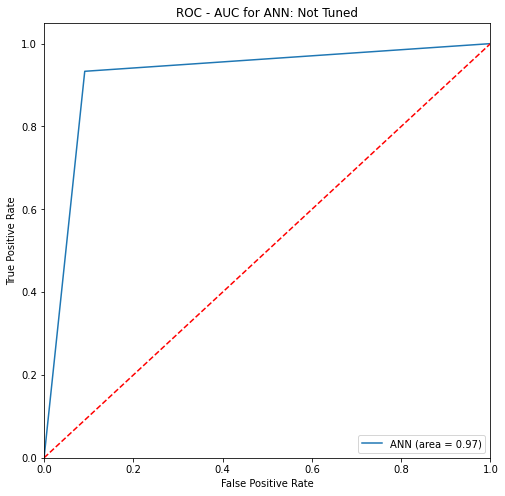

In [ ]:
ANN_roc_auc = roc_auc_score(y_test, model.predict(X_test))
#fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_wFS, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN: Not Tuned')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

######Grid Search Cross Validation - ANN w/o Feature Scaling

In [ ]:
def ANN_nofeature(optimizer = 'adam'):
  model = Sequential()
  model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu"))
  model.add(Dense(16, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
ANN_noFS = KerasClassifier(build_fn = ANN_nofeature)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
# Using Grid Search CV to getting the best parameters
parameters = {'batch_size': [10, 32],
             'epochs': [50, 100],
             'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = ANN_noFS, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)

grid_search.fit(X_train, y_train)

Epoch 1/100
752/752 [==============================] - 2s 2ms/step - loss: 0.5822 - accuracy: 0.7152
Epoch 2/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4970 - accuracy: 0.7543
Epoch 3/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4910 - accuracy: 0.7608
Epoch 4/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4896 - accuracy: 0.7591
Epoch 5/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4672 - accuracy: 0.7733
Epoch 6/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4634 - accuracy: 0.7728
Epoch 7/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4549 - accuracy: 0.7840
Epoch 8/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4529 - accuracy: 0.7864
Epoch 9/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4508 - accuracy: 0.7861
Epoch 10/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4481 - accura

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1caa70d1d0>,
             n_jobs=-1,
             param_grid={'batch_size': [10, 32], 'epochs': [50, 100],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [ ]:
grid_search.best_score_

0.8805540514715251

In [ ]:
grid_search.best_params_

{'batch_size': 10, 'epochs': 100, 'optimizer': 'rmsprop'}

Apply the best paramter based on Grid Search CV to the ANN

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu"))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs = 100)

Epoch 1/100
752/752 [==============================] - 3s 2ms/step - loss: 0.5848 - accuracy: 0.7130
Epoch 2/100
752/752 [==============================] - 1s 2ms/step - loss: 0.5369 - accuracy: 0.7381
Epoch 3/100
752/752 [==============================] - 1s 2ms/step - loss: 0.5211 - accuracy: 0.7497
Epoch 4/100
752/752 [==============================] - 1s 2ms/step - loss: 0.5060 - accuracy: 0.7614
Epoch 5/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4859 - accuracy: 0.7690
Epoch 6/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4755 - accuracy: 0.7674
Epoch 7/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4715 - accuracy: 0.7780
Epoch 8/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4629 - accuracy: 0.7835
Epoch 9/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4616 - accuracy: 0.7797
Epoch 10/100
752/752 [==============================] - 1s 2ms/step - loss: 0.4574 - accura

In [ ]:
y_pred_wFS_grid = model.predict(X_test)
y_pred_wFS_grid = (y_pred_wFS_grid > 0.5)

59/59 [==============================] - 0s 1ms/step


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_wFS_grid))
print('R square:', r2_score(y_test, y_pred_wFS_grid))
print('Accuracy:', accuracy_score(y_test, y_pred_wFS_grid))

report = classification_report(y_test, y_pred_wFS_grid, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_wFS_grid)
print(cm)

Mean Squared Error: 0.12074468085106382
R square: 0.5168441121461467
Accuracy: 0.8792553191489362
              precision    recall  f1-score   support

           0     0.9317    0.8134    0.8686       922
           1     0.8400    0.9426    0.8883       958

    accuracy                         0.8793      1880
   macro avg     0.8858    0.8780    0.8785      1880
weighted avg     0.8850    0.8793    0.8786      1880

[[750 172]
 [ 55 903]]


59/59 [==============================] - 0s 1ms/step


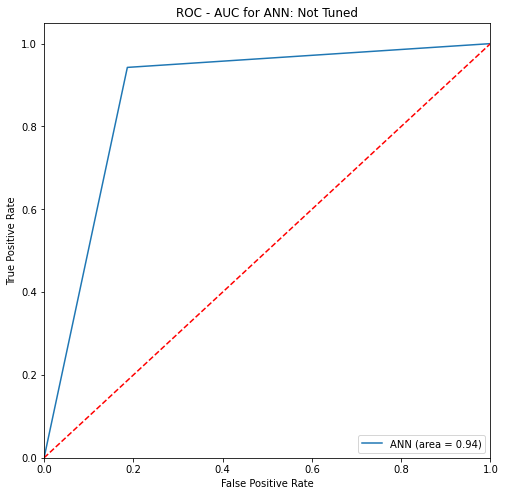

In [ ]:
ANN_roc_auc = roc_auc_score(y_test, model.predict(X_test))
#fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_wFS_grid, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN: Not Tuned')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

#####ANN with Standard Scalar

In [ ]:
model_SS = Sequential()
model_SS.add(Dense(64, input_dim = X_train_standard.shape[1], activation = "relu"))
model_SS.add(Dense(16, activation = 'relu'))
model_SS.add(Dense(1, activation = 'sigmoid'))
model_SS.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_SS.fit(X_train_standard, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
752/752 [==============================] - 4s 4ms/step - loss: 0.4581 - accuracy: 0.7823
Epoch 2/50
752/752 [==============================] - 2s 3ms/step - loss: 0.3669 - accuracy: 0.8347
Epoch 3/50
752/752 [==============================] - 2s 2ms/step - loss: 0.3067 - accuracy: 0.8639
Epoch 4/50
752/752 [==============================] - 2s 2ms/step - loss: 0.2547 - accuracy: 0.8927
Epoch 5/50
752/752 [==============================] - 2s 3ms/step - loss: 0.2140 - accuracy: 0.9161
Epoch 6/50
752/752 [==============================] - 4s 6ms/step - loss: 0.1860 - accuracy: 0.9251
Epoch 7/50
752/752 [==============================] - 3s 4ms/step - loss: 0.1709 - accuracy: 0.9300
Epoch 8/50
752/752 [==============================] - 2s 3ms/step - loss: 0.1586 - accuracy: 0.9359
Epoch 9/50
752/752 [==============================] - 3s 4ms/step - loss: 0.1443 - accuracy: 0.9448
Epoch 10/50
752/752 [==============================] - 4s 6ms/step - loss: 0.1368 - accuracy: 0.9452

In [ ]:
y_pred_SS = model_SS.predict(X_test_standard)
y_pred_SS = (y_pred_SS > 0.5)

59/59 [==============================] - 1s 6ms/step


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_SS))
print('R square:', r2_score(y_test, y_pred_SS))
print('Accuracy:', accuracy_score(y_test, y_pred_SS))

report = classification_report(y_test, y_pred_SS, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_SS)
print(cm)

Mean Squared Error: 0.045744680851063826
R square: 0.8169541570245313
Accuracy: 0.9542553191489361
              precision    recall  f1-score   support

           0     0.9534    0.9534    0.9534       922
           1     0.9551    0.9551    0.9551       958

    accuracy                         0.9543      1880
   macro avg     0.9542    0.9542    0.9542      1880
weighted avg     0.9543    0.9543    0.9543      1880

[[879  43]
 [ 43 915]]


59/59 [==============================] - 0s 2ms/step


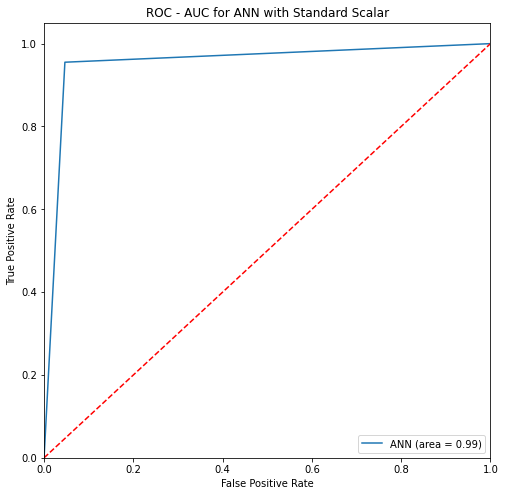

In [ ]:
ANN_roc_auc = roc_auc_score(y_test, model_SS.predict(X_test_standard))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_SS, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN with Standard Scalar')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

######Grid Search Cross Validation - ANN w/ Standard Scalar

In [ ]:
def ANN_SS(optimizer = 'adam'):
  model_SS = Sequential()
  model_SS.add(Dense(64, input_dim = X_train_standard.shape[1], activation = "relu"))
  model_SS.add(Dense(16, activation = 'relu'))
  model_SS.add(Dense(1, activation = 'sigmoid'))
  model_SS.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
  return model_SS

In [ ]:
ANN_SScale = KerasClassifier(build_fn = ANN_SS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
# Using Grid Search CV to getting the best parameters
parameters = {'batch_size': [10, 32],
             'epochs': [50, 100],
             'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = ANN_SScale, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)

grid_search.fit(X_train_standard, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/100
752/752 [==============================] - 3s 3ms/step - loss: 0.4576 - accuracy: 0.7885
Epoch 2/100
752/752 [==============================] - 2s 3ms/step - loss: 0.3601 - accuracy: 0.8388
Epoch 3/100
752/752 [==============================] - 2s 3ms/step - loss: 0.3042 - accuracy: 0.8687
Epoch 4/100
752/752 [==============================] - 1s 2ms/step - loss: 0.2580 - accuracy: 0.8943
Epoch 5/100
752/752 [==============================] - 1s 2ms/step - loss: 0.2235 - accuracy: 0.9114
Epoch 6/100
752/752 [==============================] - 1s 2ms/step - loss: 0.1937 - accuracy: 0.9231
Epoch 7/100
752/752 [==============================] - 1s 2ms/step - loss: 0.1727 - accuracy: 0.9280
Epoch 8/100
752/752 [==============================] - 1s 2ms/step - loss: 0.1584 - accuracy: 0.9346
Epoch 9/100
752/752 [==============================] - 1s 2ms/step - loss: 0.1499 - accuracy: 0.9400
Epoch 10/100
752/752 [==============================] - 1s 2ms/step - loss: 0.1393 - accura

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1caa39fc10>,
             n_jobs=-1,
             param_grid={'batch_size': [10, 32], 'epochs': [50, 100],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [ ]:
grid_search.best_score_

0.9598314010277317

In [ ]:
grid_search.best_params_

{'batch_size': 10, 'epochs': 100, 'optimizer': 'rmsprop'}

Apply best parameter based on Grid Search CV to ANN with Standard Scalar

In [ ]:
model_SS_grid = Sequential()
model_SS_grid.add(Dense(64, input_dim = X_train_standard.shape[1], activation = "relu"))
model_SS_grid.add(Dense(16, activation = 'relu'))
model_SS_grid.add(Dense(1, activation = 'sigmoid'))
model_SS_grid.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_SS_grid.fit(X_train_standard, y_train, batch_size=10, epochs = 100)

Epoch 1/100
752/752 [==============================] - 2s 2ms/step - loss: 0.4464 - accuracy: 0.7920
Epoch 2/100
752/752 [==============================] - 1s 2ms/step - loss: 0.3633 - accuracy: 0.8449
Epoch 3/100
752/752 [==============================] - 1s 2ms/step - loss: 0.3212 - accuracy: 0.8645
Epoch 4/100
752/752 [==============================] - 1s 2ms/step - loss: 0.2812 - accuracy: 0.8804
Epoch 5/100
752/752 [==============================] - 1s 2ms/step - loss: 0.2477 - accuracy: 0.8994
Epoch 6/100
752/752 [==============================] - 4s 5ms/step - loss: 0.2199 - accuracy: 0.9106
Epoch 7/100
752/752 [==============================] - 4s 6ms/step - loss: 0.1973 - accuracy: 0.9209
Epoch 8/100
752/752 [==============================] - 3s 4ms/step - loss: 0.1796 - accuracy: 0.9264
Epoch 9/100
752/752 [==============================] - 3s 4ms/step - loss: 0.1679 - accuracy: 0.9319
Epoch 10/100
752/752 [==============================] - 3s 4ms/step - loss: 0.1575 - accura

In [ ]:
y_pred_SS_grid = model_SS_grid.predict(X_test_standard)
y_pred_SS_grid = (y_pred_SS_grid > 0.5)

59/59 [==============================] - 0s 1ms/step


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_SS_grid))
print('R square:', r2_score(y_test, y_pred_SS_grid))
print('Accuracy:', accuracy_score(y_test, y_pred_SS_grid))

report = classification_report(y_test, y_pred_SS_grid, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_SS_grid)
print(cm)

Mean Squared Error: 0.036702127659574466
R square: 0.8531376376127053
Accuracy: 0.9632978723404255
              precision    recall  f1-score   support

           0     0.9787    0.9458    0.9619       922
           1     0.9494    0.9802    0.9646       958

    accuracy                         0.9633      1880
   macro avg     0.9641    0.9630    0.9633      1880
weighted avg     0.9638    0.9633    0.9633      1880

[[872  50]
 [ 19 939]]


59/59 [==============================] - 0s 1ms/step


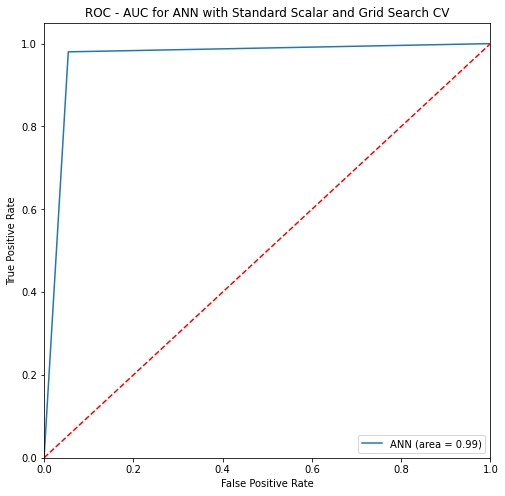

In [ ]:
ANN_roc_auc = roc_auc_score(y_test, model_SS_grid.predict(X_test_standard))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_SS_grid, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN with Standard Scalar and Grid Search CV')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

#####ANN with MinMaxScalar

In [ ]:
model_MM = Sequential()
model_MM.add(Dense(64, input_dim = X_train_MinMax.shape[1], activation = "relu"))
model_MM.add(Dense(16, activation = 'relu'))
model_MM.add(Dense(1, activation = 'sigmoid'))
model_MM.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_MinMax = model_MM.fit(X_train_MinMax, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
752/752 [==============================] - 5s 4ms/step - loss: 0.4574 - accuracy: 0.7965
Epoch 2/50
752/752 [==============================] - 2s 2ms/step - loss: 0.3266 - accuracy: 0.8575
Epoch 3/50
752/752 [==============================] - 2s 2ms/step - loss: 0.2712 - accuracy: 0.8820
Epoch 4/50
752/752 [==============================] - 2s 2ms/step - loss: 0.2406 - accuracy: 0.8961
Epoch 5/50
752/752 [==============================] - 3s 4ms/step - loss: 0.2153 - accuracy: 0.9061
Epoch 6/50
752/752 [==============================] - 2s 3ms/step - loss: 0.2023 - accuracy: 0.9118
Epoch 7/50
752/752 [==============================] - 5s 6ms/step - loss: 0.1840 - accuracy: 0.9205
Epoch 8/50
752/752 [==============================] - 5s 7ms/step - loss: 0.1802 - accuracy: 0.9238
Epoch 9/50
752/752 [==============================] - 3s 5ms/step - loss: 0.1758 - accuracy: 0.9218
Epoch 10/50
752/752 [==============================] - 2s 2ms/step - loss: 0.1618 - accuracy: 0.9310

In [ ]:
y_pred_MM = model_MM.predict(X_test_MinMax)
y_pred_MM = (y_pred_MM > 0.5)

59/59 [==============================] - 0s 3ms/step


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_MM))
print('R square:', r2_score(y_test, y_pred_MM))
print('Accuracy:', accuracy_score(y_test, y_pred_MM))

report = classification_report(y_test, y_pred_MM, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_MM)
print(cm)

Mean Squared Error: 0.05106382978723404
R square: 0.7956697566785467
Accuracy: 0.948936170212766
              precision    recall  f1-score   support

           0     0.9470    0.9490    0.9480       922
           1     0.9508    0.9489    0.9498       958

    accuracy                         0.9489      1880
   macro avg     0.9489    0.9489    0.9489      1880
weighted avg     0.9489    0.9489    0.9489      1880

[[875  47]
 [ 49 909]]


59/59 [==============================] - 0s 2ms/step


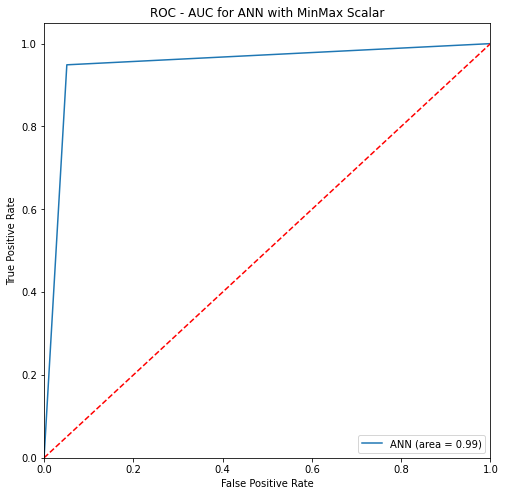

In [ ]:
ANN_roc_auc = roc_auc_score(y_test, model_MM.predict(X_test_MinMax))
#fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_MM, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN with MinMax Scalar')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

######Grid Search Cross Validation - ANN w/ MinMax Scalar

In [ ]:
def ANN_MinMax(optimizer = 'adam'):
  model_MM = Sequential()
  model_MM.add(Dense(64, input_dim = X_train_MinMax.shape[1], activation = "relu"))
  model_MM.add(Dense(16, activation = 'relu'))
  model_MM.add(Dense(1, activation = 'sigmoid'))
  model_MM.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
  return model_MM

In [ ]:
ANN_MinMax = KerasClassifier(build_fn = ANN_MinMax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
# Using Grid Search CV to getting the best parameters
parameters = {'batch_size': [10, 32],
             'epochs': [50, 100],
             'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = ANN_MinMax, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)

grid_search.fit(X_train_MinMax, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/100
752/752 [==============================] - 2s 2ms/step - loss: 0.4521 - accuracy: 0.7920
Epoch 2/100
752/752 [==============================] - 1s 2ms/step - loss: 0.3245 - accuracy: 0.8570
Epoch 3/100
752/752 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.8808
Epoch 4/100
752/752 [==============================] - 1s 2ms/step - loss: 0.2314 - accuracy: 0.9041
Epoch 5/100
752/752 [==============================] - 1s 2ms/step - loss: 0.2090 - accuracy: 0.9102
Epoch 6/100
752/752 [==============================] - 1s 2ms/step - loss: 0.1874 - accuracy: 0.9206
Epoch 7/100
752/752 [==============================] - 1s 2ms/step - loss: 0.1750 - accuracy: 0.9270
Epoch 8/100
752/752 [==============================] - 1s 2ms/step - loss: 0.1722 - accuracy: 0.9258
Epoch 9/100
752/752 [==============================] - 1s 2ms/step - loss: 0.1601 - accuracy: 0.9315
Epoch 10/100
752/752 [==============================] - 1s 2ms/step - loss: 0.1588 - accura

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f94b13a0ed0>,
             n_jobs=-1,
             param_grid={'batch_size': [10, 32], 'epochs': [50, 100],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [ ]:
grid_search.best_score_

0.9534460334649848

In [ ]:
grid_search.best_params_

{'batch_size': 10, 'epochs': 100, 'optimizer': 'adam'}

Apply best paramter based on Grid Search CV to ANN with MinMax Scalar

In [ ]:
model_MM_grid = Sequential()
model_MM_grid.add(Dense(64, input_dim = X_train_MinMax.shape[1], activation = "relu"))
model_MM_grid.add(Dense(16, activation = 'relu'))
model_MM_grid.add(Dense(1, activation = 'sigmoid'))
model_MM_grid.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_MM_grid.fit(X_train_MinMax, y_train, batch_size=10, epochs = 100)

Epoch 1/100
752/752 [==============================] - 2s 2ms/step - loss: 0.4616 - accuracy: 0.7897
Epoch 2/100
752/752 [==============================] - 2s 2ms/step - loss: 0.3258 - accuracy: 0.8561
Epoch 3/100
752/752 [==============================] - 3s 5ms/step - loss: 0.2717 - accuracy: 0.8802
Epoch 4/100
752/752 [==============================] - 3s 4ms/step - loss: 0.2415 - accuracy: 0.8937
Epoch 5/100
752/752 [==============================] - 2s 2ms/step - loss: 0.2193 - accuracy: 0.9074
Epoch 6/100
752/752 [==============================] - 2s 2ms/step - loss: 0.1984 - accuracy: 0.9170
Epoch 7/100
752/752 [==============================] - 2s 2ms/step - loss: 0.1908 - accuracy: 0.9182
Epoch 8/100
752/752 [==============================] - 2s 3ms/step - loss: 0.1807 - accuracy: 0.9218
Epoch 9/100
752/752 [==============================] - 3s 4ms/step - loss: 0.1734 - accuracy: 0.9278
Epoch 10/100
752/752 [==============================] - 2s 2ms/step - loss: 0.1697 - accura

In [ ]:
y_pred_MM_grid = model_MM_grid.predict(X_test_MinMax)
y_pred_MM_grid = (y_pred_MM_grid > 0.5)

59/59 [==============================] - 0s 2ms/step


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_MM_grid))
print('R square:', r2_score(y_test, y_pred_MM_grid))
print('Accuracy:', accuracy_score(y_test, y_pred_MM_grid))

report = classification_report(y_test, y_pred_MM_grid, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_MM_grid)
print(cm)

Mean Squared Error: 0.04042553191489362
R square: 0.838238557370516
Accuracy: 0.9595744680851064
              precision    recall  f1-score   support

           0     0.9388    0.9816    0.9597       922
           1     0.9814    0.9384    0.9594       958

    accuracy                         0.9596      1880
   macro avg     0.9601    0.9600    0.9596      1880
weighted avg     0.9605    0.9596    0.9596      1880

[[905  17]
 [ 59 899]]


59/59 [==============================] - 0s 1ms/step


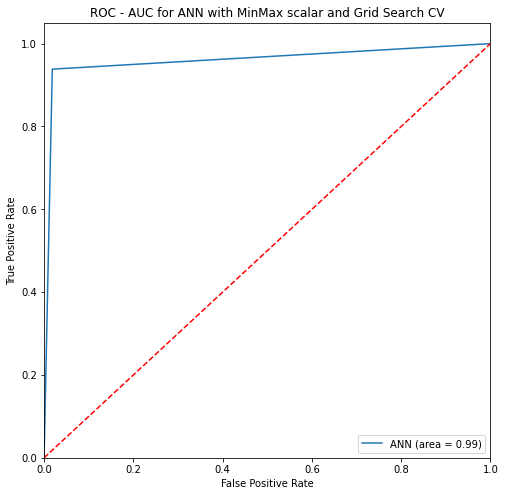

In [ ]:
ANN_roc_auc = roc_auc_score(y_test, model_MM_grid.predict(X_test_MinMax))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_MM_grid, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN with MinMax scalar and Grid Search CV')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

####Random Forest

#####Random Forest without Feature Scaling

In [ ]:
rf_wFS = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_wFS.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
rf_wFS_pred = rf_wFS.predict(X_test)

In [ ]:
report = classification_report(y_test, rf_wFS_pred, digits = 4)
print(report)

              precision    recall  f1-score   support

           0     0.9528    0.9859    0.9691       922
           1     0.9860    0.9530    0.9692       958

    accuracy                         0.9691      1880
   macro avg     0.9694    0.9695    0.9691      1880
weighted avg     0.9697    0.9691    0.9692      1880



Text(0.5, 0, 'False Positive Rate')

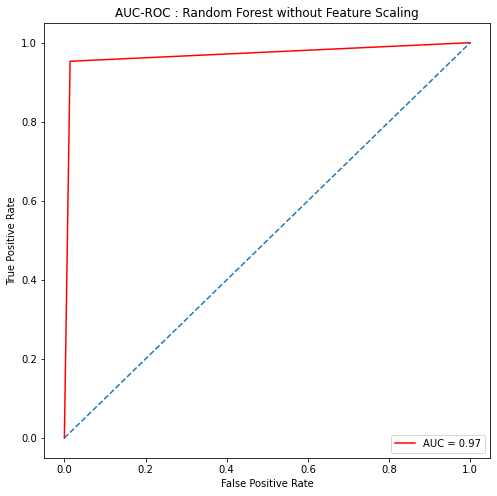

In [ ]:
rf_auc = roc_auc_score(y_test, rf_wFS_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_wFS_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest without Feature Scaling')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

######Random Forest w/o Feature Scaling with Randomized Search Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 40, num = 10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf' : min_samples_leaf
               }

In [ ]:
rf_wFS_grid = RandomizedSearchCV(estimator = rf_wFS, param_distributions= random_grid, cv = 5, n_jobs = -1)
rf_wFS_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 13, 16, 20, 23, 26,
                                                      30, 33, 36, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]})

In [ ]:
rf_wFS_grid.best_score_

0.9756586118543057

In [ ]:
rf_wFS_grid.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 23}

Apply best parameter and apply it to the Random Forest without Feature Scaling

In [ ]:
rf_wFS_grid_best = RandomForestClassifier(max_depth=23, min_samples_leaf=1,
                                 min_samples_split=5, n_estimators=1000)
rf_wFS_grid_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=23, min_samples_split=5, n_estimators=1000)

In [ ]:
rf_wFS_grid_pred = rf_wFS_grid_best.predict(X_test)

In [ ]:
report = classification_report(y_test, rf_wFS_grid_pred, digits = 4)
print(report)

              precision    recall  f1-score   support

           0     0.9521    0.9924    0.9719       922
           1     0.9924    0.9520    0.9718       958

    accuracy                         0.9718      1880
   macro avg     0.9723    0.9722    0.9718      1880
weighted avg     0.9726    0.9718    0.9718      1880



Text(0.5, 0, 'False Positive Rate')

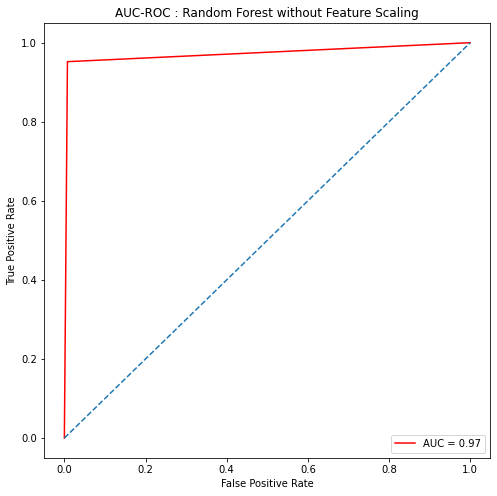

In [ ]:
rf_auc = roc_auc_score(y_test, rf_wFS_grid_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_wFS_grid_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest without Feature Scaling')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#####Random Forest with MinMax Scalar

In [ ]:
rf_MM = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_MM.fit(X_train_MinMax, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
rf_MM_pred = rf_MM.predict(X_test_MinMax)

In [ ]:
rf_MM_eval = classification_report(y_test, rf_MM_pred, digits = 4)
print(rf_MM_eval)

              precision    recall  f1-score   support

           0     0.9479    0.9859    0.9665       922
           1     0.9859    0.9478    0.9665       958

    accuracy                         0.9665      1880
   macro avg     0.9669    0.9669    0.9665      1880
weighted avg     0.9672    0.9665    0.9665      1880



Text(0.5, 0, 'False Positive Rate')

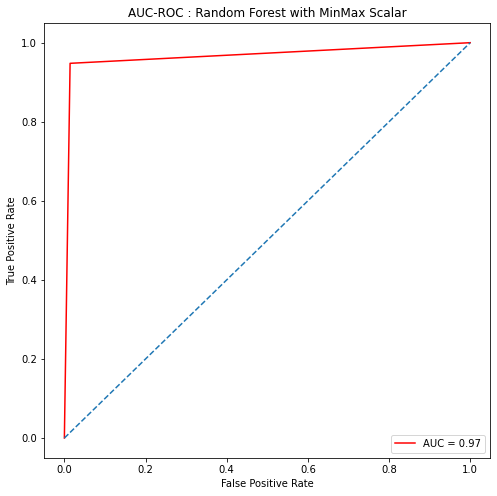

In [ ]:
rf_auc = roc_auc_score(y_test, rf_MM_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_MM_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest with MinMax Scalar')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

######Random Forest with MinMax Scalling with Randomized Search Cross Validation

In [ ]:
rf_MinMax_rand = RandomizedSearchCV(estimator = rf_MM, param_distributions= random_grid, cv = 5, n_jobs = -1)
rf_MinMax_rand.fit(X_train_MinMax, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 13, 16, 20, 23, 26,
                                                      30, 33, 36, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]})

In [ ]:
rf_MinMax_rand.best_score_

0.9757914136266475

In [ ]:
rf_MinMax_rand.best_params_

{'n_estimators': 466,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 23}

In [ ]:
rf_MinMax_rand_best = RandomForestClassifier(max_depth=23, min_samples_leaf=1, min_samples_split=5, n_estimators=466)
rf_MinMax_rand_best.fit(X_train_MinMax, y_train)

RandomForestClassifier(max_depth=23, min_samples_split=5, n_estimators=466)

In [ ]:
rf_MinMax_rand_pred = rf_MinMax_rand_best.predict(X_test_MinMax)

In [ ]:
report = classification_report(y_test, rf_MinMax_rand_pred, digits = 4)
print(report)

              precision    recall  f1-score   support

           0     0.9522    0.9946    0.9729       922
           1     0.9945    0.9520    0.9728       958

    accuracy                         0.9729      1880
   macro avg     0.9734    0.9733    0.9729      1880
weighted avg     0.9738    0.9729    0.9729      1880



Text(0.5, 0, 'False Positive Rate')

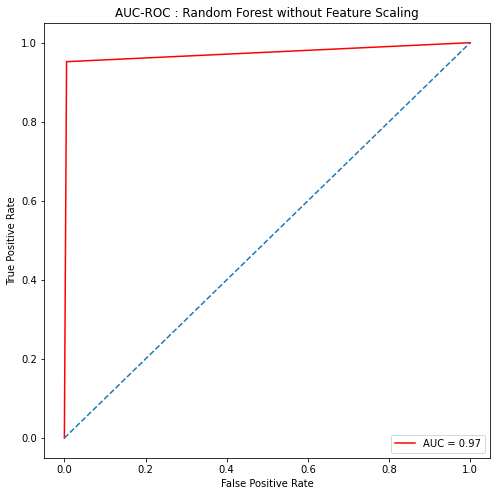

In [ ]:
rf_auc = roc_auc_score(y_test, rf_MinMax_rand_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_MinMax_rand_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest without Feature Scaling')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#####Random Forest with Standard Scalar

In [ ]:
rf_SS = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_SS.fit(X_train_standard, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
rf_SS_pred = rf_SS.predict(X_test_standard)

In [ ]:
rf_SS_eval = classification_report(y_test, rf_SS_pred, digits = 4)
print(rf_SS_eval)

              precision    recall  f1-score   support

           0     0.9722    0.7213    0.8281       922
           1     0.7851    0.9802    0.8719       958

    accuracy                         0.8532      1880
   macro avg     0.8787    0.8507    0.8500      1880
weighted avg     0.8769    0.8532    0.8504      1880



Text(0.5, 0, 'False Positive Rate')

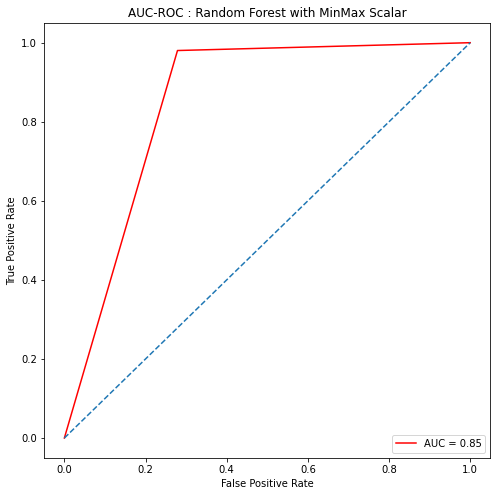

In [ ]:
rf_auc = roc_auc_score(y_test, rf_SS_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_SS_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest with MinMax Scalar')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

######Random Forest with Standard Scalar with Randomized Search Cross Validation

In [ ]:
rf_SScalar_rand = RandomizedSearchCV(estimator = rf_SS, param_distributions= random_grid, cv = 5, n_jobs = -1)
rf_SScalar_rand.fit(X_train_MinMax, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 13, 16, 20, 23, 26,
                                                      30, 33, 36, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]})

In [ ]:
rf_SScalar_rand.best_score_

0.9756584349032431

In [ ]:
rf_SScalar_rand.best_params_

{'n_estimators': 466,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 40}

In [ ]:
rf_SScalar_rand_best = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=466)
rf_SScalar_rand_best.fit(X_train_standard, y_train)

RandomForestClassifier(max_depth=40, min_samples_split=5, n_estimators=466)

In [ ]:
rf_SScalar_rand_pred = rf_SScalar_rand_best.predict(X_test_standard)

In [ ]:
report = classification_report(y_test, rf_SScalar_rand_pred, digits = 4)
print(report)

              precision    recall  f1-score   support

           0     0.9922    0.5510    0.7085       922
           1     0.6974    0.9958    0.8203       958

    accuracy                         0.7777      1880
   macro avg     0.8448    0.7734    0.7644      1880
weighted avg     0.8420    0.7777    0.7655      1880



Text(0.5, 0, 'False Positive Rate')

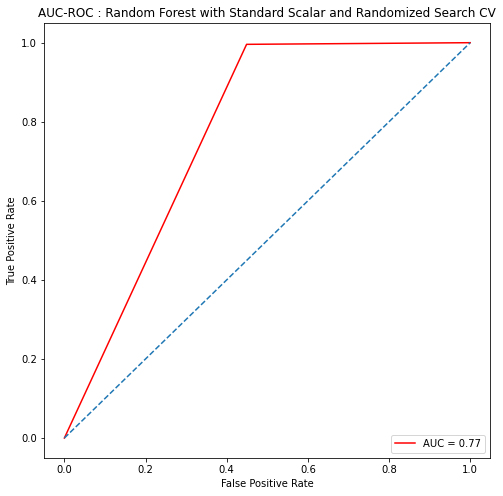

In [ ]:
rf_auc = roc_auc_score(y_test, rf_SScalar_rand_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_SScalar_rand_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest with Standard Scalar and Randomized Search CV')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###Genetic Algorithm with Neural Network (GANN)

GA setup

In [ ]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.2 MB/s 


In [ ]:
import pygad
import pygad.nn
import pygad.gann

In [ ]:
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs
    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],data_inputs=data_inputs, problem_type="classification")
    correct_predictions = np.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100
    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance
    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, population_vectors=ga_instance.population)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Accuracy   = {fitness}%".format(fitness=ga_instance.best_solution()[1]))

#####GANN without Feature Scaling

In [ ]:
data_inputs = X_train
data_outputs = np.array(y_train)

In [ ]:
GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=data_inputs.shape[1],
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="sigmoid")

In [ ]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

In [ ]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=3,
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

In [ ]:
ga_instance.run()

Generation = 1
Accuracy   = 58.313381218409155%
Generation = 2
Accuracy   = 55.679702048417134%
Generation = 3
Accuracy   = 55.679702048417134%
Generation = 4
Accuracy   = 55.679702048417134%
Generation = 5
Accuracy   = 55.679702048417134%
Generation = 6
Accuracy   = 55.679702048417134%
Generation = 7
Accuracy   = 58.00744878957169%
Generation = 8
Accuracy   = 58.127161479116786%
Generation = 9
Accuracy   = 59.37749401436552%
Generation = 10
Accuracy   = 59.37749401436552%
Generation = 11
Accuracy   = 60.82734769885608%
Generation = 12
Accuracy   = 63.66054801808991%
Generation = 13
Accuracy   = 66.46714551742484%
Generation = 14
Accuracy   = 66.46714551742484%
Generation = 15
Accuracy   = 66.4804469273743%
Generation = 16
Accuracy   = 69.14072891726522%
Generation = 17
Accuracy   = 69.14072891726522%
Generation = 18
Accuracy   = 69.14072891726522%
Generation = 19
Accuracy   = 69.14072891726522%
Generation = 20
Accuracy   = 69.14072891726522%
Generation = 21
Accuracy   = 69.14072891726

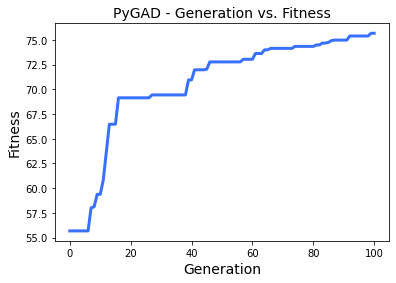

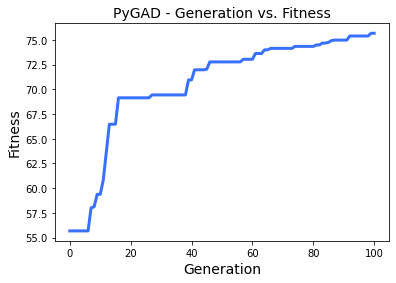

In [ ]:
ga_instance.plot_result()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

[-2.07880099e-02 -9.16187295e-02  7.30612611e-03 -4.02217894e-02
 -9.71609643e-02  4.11835692e-01  5.38356649e-01  1.74510484e+00
 -9.31119168e-01  1.52428863e+00 -2.35942089e+00  2.76832660e+00
 -1.71404542e-02  2.36861896e-01  8.12151293e-01  3.57366196e-01
  8.97289251e-01 -6.71615859e-01 -2.07450102e+00 -7.85577891e-01
  5.89346848e-01 -6.40128184e-01 -1.38344471e+00 -2.33076116e-01
  2.14302839e-01  1.69761689e-03  5.45715957e-02 -2.31981944e+00
 -5.07998034e-01 -1.66767829e-01 -1.15233333e-01 -1.13704605e-01
 -1.26441320e-01 -1.31186468e+00  3.16650043e-01 -4.76719196e-01
 -1.29963366e+00  3.67174325e-01  2.38866186e-02 -9.21417182e-02]
75.67172120244746
0


#####GANN with MinMax Scalar

In [ ]:
data_inputs = X_train_MinMax
data_outputs = np.array(y_train)

In [ ]:
GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=data_inputs.shape[1],
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="sigmoid")

In [ ]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

In [ ]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=3,
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

In [ ]:
ga_instance.run()

Generation = 1
Accuracy   = 59.191274275073155%
Generation = 2
Accuracy   = 59.191274275073155%
Generation = 3
Accuracy   = 59.191274275073155%
Generation = 4
Accuracy   = 59.191274275073155%
Generation = 5
Accuracy   = 59.191274275073155%
Generation = 6
Accuracy   = 59.191274275073155%
Generation = 7
Accuracy   = 59.191274275073155%
Generation = 8
Accuracy   = 59.191274275073155%
Generation = 9
Accuracy   = 59.191274275073155%
Generation = 10
Accuracy   = 59.191274275073155%
Generation = 11
Accuracy   = 59.191274275073155%
Generation = 12
Accuracy   = 59.191274275073155%
Generation = 13
Accuracy   = 59.191274275073155%
Generation = 14
Accuracy   = 59.191274275073155%
Generation = 15
Accuracy   = 59.191274275073155%
Generation = 16
Accuracy   = 59.191274275073155%
Generation = 17
Accuracy   = 59.191274275073155%
Generation = 18
Accuracy   = 60.548018089917534%
Generation = 19
Accuracy   = 60.72093641926044%
Generation = 20
Accuracy   = 61.87815908486299%
Generation = 21
Accuracy   = 61

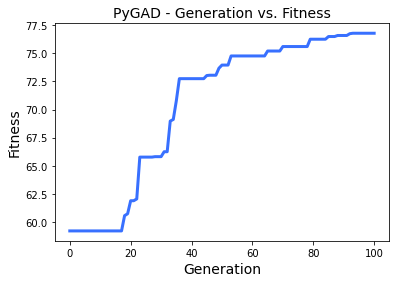

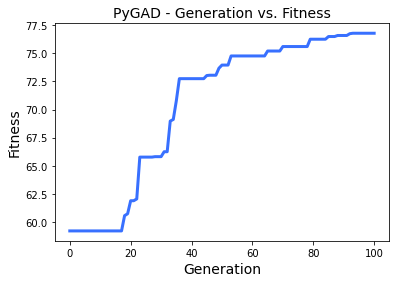

In [ ]:
ga_instance.plot_result()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

[ 2.71033611e-01  1.63337294e-03 -5.92926749e-01 -2.47227170e-01
 -1.86591121e-02  2.09062777e-03 -3.29964691e-02  1.97983821e-01
 -5.18101039e-01  2.53787914e-01 -1.87578349e+00  1.97452478e-01
  4.63924287e-02  1.00215198e+00  2.95320215e-01  5.37146287e-02
  1.37526595e-01 -4.54544646e-02  9.08354962e-02  4.33344947e-01
 -1.26604643e+00  7.77703645e-02 -6.17114906e-01 -1.02110063e+00
  4.70580185e-01  2.19191269e+00  8.86977116e-02 -8.12022534e-01
  4.64069034e-01  8.58598728e-01  2.89727925e-01 -8.32091497e-01
  2.07295473e-01  1.37596604e-01 -1.13244832e+00 -1.44186808e-01
 -1.31659148e-01  4.54627039e-01  3.39182538e-01  4.14182360e-02]
76.78903963820164
0


#####GANN with Standard Scalar

In [ ]:
data_inputs = X_train_standard
data_outputs = np.array(y_train)

In [ ]:
GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=data_inputs.shape[1],
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="sigmoid")

In [ ]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

In [ ]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=3,
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

In [ ]:
ga_instance.run()

Generation = 1
Accuracy   = 62.07768023410482%
Generation = 2
Accuracy   = 62.07768023410482%
Generation = 3
Accuracy   = 62.07768023410482%
Generation = 4
Accuracy   = 62.07768023410482%
Generation = 5
Accuracy   = 62.07768023410482%
Generation = 6
Accuracy   = 62.07768023410482%
Generation = 7
Accuracy   = 62.07768023410482%
Generation = 8
Accuracy   = 62.07768023410482%
Generation = 9
Accuracy   = 62.07768023410482%
Generation = 10
Accuracy   = 62.07768023410482%
Generation = 11
Accuracy   = 62.07768023410482%
Generation = 12
Accuracy   = 62.07768023410482%
Generation = 13
Accuracy   = 62.07768023410482%
Generation = 14
Accuracy   = 62.07768023410482%
Generation = 15
Accuracy   = 62.07768023410482%
Generation = 16
Accuracy   = 62.07768023410482%
Generation = 17
Accuracy   = 62.07768023410482%
Generation = 18
Accuracy   = 62.07768023410482%
Generation = 19
Accuracy   = 62.07768023410482%
Generation = 20
Accuracy   = 62.07768023410482%
Generation = 21
Accuracy   = 62.07768023410482%
G

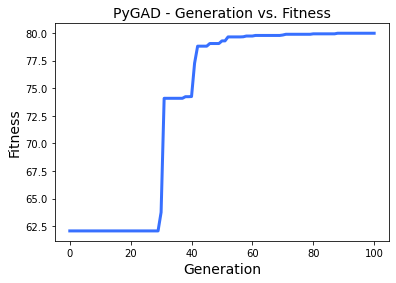

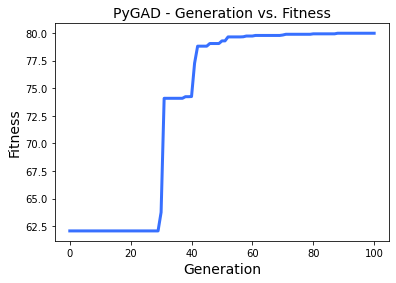

In [ ]:
ga_instance.plot_result()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

[-6.29767215e-02  3.68992050e-01  8.72020351e-03  2.59655672e-01
 -5.66327336e-02 -5.75135915e-02  7.54253948e-02 -9.48398466e-01
 -7.53936614e-02  3.52154405e-01  1.24285665e+00  1.38592485e-01
  1.59115887e+00  1.18105670e+00  1.09216559e-01  7.63563331e-01
 -5.18390694e-02  2.02377752e+00  5.73344468e-03  3.25411218e-01
 -3.54220620e-02 -6.65297369e-01 -9.15112259e-01 -7.57113458e-02
 -3.21909368e-01  9.10466026e-01  4.09828342e-03  8.58865904e-01
 -2.95462551e-02  5.90861280e-01 -2.75897316e-04 -9.73092328e-01
  1.35067569e-01  4.16257007e-01 -6.56122339e-03 -3.90185811e-01
  1.96121351e+00 -1.73829729e+00 -6.14008416e-02  2.12630177e-02]
79.98137802607076
0


#Model Evaluation

In [3]:
Model_Name = ['RF w/o FS & CB', 'RF w/o FS', 'RF MinMax', 'RF standard scalar', 'RF w/o FS RSCV', 'RF MinMax RSCV', 'RF standard scalar RSCV','ANN w/o FS & CB', 'ANN w/o FS', 'ANN MinMax', 'ANN standard scalar', 'ANN w/o FS GSCV', 'ANN MinMax GSCV', 'ANN standard scalar GSCV','GANN w/o FS CB' , 'GANN w/o FS', 'GANN MinMax', 'GANN standard scalar']

In [4]:
Model_Accuracy = [94.5, 96.91, 96.65,85.32, 97.18, 97.29, 77.77, 94.60, 92.13, 94.89, 95.43, 87.93, 95.96, 96.33, 96.03, 75.67, 76.79, 79.98]

In [5]:
eval = list(zip(Model_Name, Model_Accuracy))
eval = pd.DataFrame(eval, columns = ['Model_Name', 'Accuracy'])
eval

,Model_Name,Accuracy
0,RF w/o FS & CB,94.50
1,RF w/o FS,96.91
2,RF MinMax,96.65
3,RF standard scalar,85.32
4,RF w/o FS RSCV,97.18
5,RF MinMax RSCV,97.29
6,RF standard scalar RSCV,77.77
7,ANN w/o FS & CB,94.60
8,ANN w/o FS,92.13
9,ANN MinMax,94.89


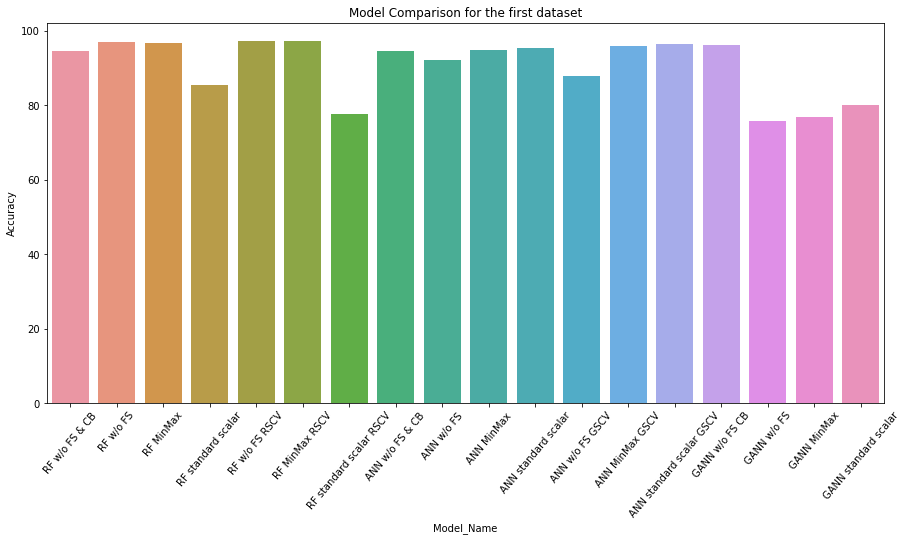

 Note:
 FS: Feature scaling
 CB: Class Balancing
 RSCV: Randomized Search Cross-validation
 GSCV: Grid Search Cross-validation
                  Model_Name  Accuracy
0             RF w/o FS & CB     94.50
1                  RF w/o FS     96.91
2                  RF MinMax     96.65
3         RF standard scalar     85.32
4             RF w/o FS RSCV     97.18
5             RF MinMax RSCV     97.29
6    RF standard scalar RSCV     77.77
7            ANN w/o FS & CB     94.60
8                 ANN w/o FS     92.13
9                 ANN MinMax     94.89
10       ANN standard scalar     95.43
11           ANN w/o FS GSCV     87.93
12           ANN MinMax GSCV     95.96
13  ANN standard scalar GSCV     96.33
14            GANN w/o FS CB     96.03
15               GANN w/o FS     75.67
16               GANN MinMax     76.79
17      GANN standard scalar     79.98


In [6]:
fig = plt.figure(figsize = (15,7))
eval_barplot = sns.barplot(x = "Model_Name", y = "Accuracy", data = eval).set(title="Model Comparison for the first dataset")
plt.xticks(rotation = 50)
plt.show()
print(" Note:\n FS: Feature scaling\n CB: Class Balancing\n RSCV: Randomized Search Cross-validation\n GSCV: Grid Search Cross-validation")
print(eval)

In [17]:
top5acc = eval.sort_values(by=['Accuracy'], ascending=False)
top5acc = top5acc.head(5)

In [18]:
top5acc

,Model_Name,Accuracy
5,RF MinMax RSCV,97.29
4,RF w/o FS RSCV,97.18
1,RF w/o FS,96.91
2,RF MinMax,96.65
13,ANN standard scalar GSCV,96.33


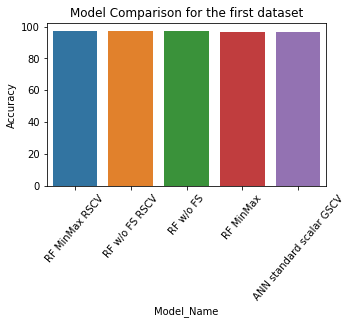

 Note:
 FS: Feature scaling
 CB: Class Balancing
 RSCV: Randomized Search Cross-validation
 GSCV: Grid Search Cross-validation
                  Model_Name  Accuracy
5             RF MinMax RSCV     97.29
4             RF w/o FS RSCV     97.18
1                  RF w/o FS     96.91
2                  RF MinMax     96.65
13  ANN standard scalar GSCV     96.33


In [22]:
fig = plt.figure(figsize = (5,3))
eval_barplot = sns.barplot(x = "Model_Name", y = "Accuracy", data = top5acc).set(title="Model Comparison for the first dataset")
plt.xticks(rotation = 50)
plt.show()
print(" Note:\n FS: Feature scaling\n CB: Class Balancing\n RSCV: Randomized Search Cross-validation\n GSCV: Grid Search Cross-validation")
print(top5acc)